In [30]:
import os
import random
import numpy as np
import pandas as pd
from PIL import Image as PILImage
import matplotlib.pyplot as plt
from keras.optimizers import Adam, SGD, Adagrad, RMSprop
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D , MaxPool2D, Flatten, Dense
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, Callback
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

In [14]:
train_ds = tf.keras.utils.image_dataset_from_directory("/kaggle/input/cs671-assignment5/Group_18/train", image_size=(224,224),batch_size=1, seed = 42, label_mode = 'categorical')
val_ds = tf.keras.utils.image_dataset_from_directory("/kaggle/input/cs671-assignment5/Group_18/val", image_size=(224,224),batch_size=1, seed = 42, label_mode = 'categorical')
test_ds = tf.keras.utils.image_dataset_from_directory("/kaggle/input/cs671-assignment5/Group_18/test", image_size=(224,224),batch_size=1, seed = 42, label_mode = 'categorical')
class_names = train_ds.class_names

Found 250 files belonging to 5 classes.
Found 50 files belonging to 5 classes.
Found 100 files belonging to 5 classes.


In [15]:
# %%script echo skip
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

In [9]:
%%script echo skip
train_ds = train_ds.map(lambda x, y: (tf.keras.applications.vgg19.preprocess_input(x), y))
val_ds = val_ds.map(lambda x, y: (tf.keras.applications.vgg19.preprocess_input(x), y))
test_ds = test_ds.map(lambda x, y: (tf.keras.applications.vgg19.preprocess_input(x), y))

In [23]:
%%script echo skip

# Architecture 1 (4 layer)
model = models.Sequential()
model.add(layers.Conv2D(8, (11, 11),strides=4, padding='valid', activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((3, 3),strides=(2, 2)))
model.add(layers.Conv2D(16, (5, 5),strides=1, padding='valid', activation='relu'))
model.add(layers.MaxPooling2D((3, 3),strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(5, activation ='softmax'))

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=0), optimizer='adam', metrics=['accuracy'])
es = keras.callbacks.EarlyStopping(monitor='val_loss', verbose=2, patience=8)
out = model.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=[es])
model.summary()

Epoch 1/100
250/250 [==============================] - 3s 6ms/step - loss: 1.5153 - accuracy: 0.3320 - val_loss: 1.2966 - val_accuracy: 0.4800
Epoch 2/100
250/250 [==============================] - 1s 6ms/step - loss: 1.0899 - accuracy: 0.5880 - val_loss: 1.0735 - val_accuracy: 0.6200
Epoch 3/100
250/250 [==============================] - 1s 6ms/step - loss: 0.7880 - accuracy: 0.7320 - val_loss: 0.8731 - val_accuracy: 0.6800
Epoch 4/100
250/250 [==============================] - 2s 6ms/step - loss: 0.5026 - accuracy: 0.8360 - val_loss: 0.6066 - val_accuracy: 0.7800
Epoch 5/100
250/250 [==============================] - 1s 6ms/step - loss: 0.2925 - accuracy: 0.9000 - val_loss: 0.3473 - val_accuracy: 0.8800
Epoch 6/100
250/250 [==============================] - 2s 6ms/step - loss: 0.2094 - accuracy: 0.9200 - val_loss: 0.4754 - val_accuracy: 0.8200
Epoch 7/100
250/250 [==============================] - 2s 6ms/step - loss: 0.2208 - accuracy: 0.9360 - val_loss: 0.7956 - val_accuracy: 0.8000

In [33]:
# %%script echo skip

# Architecture 2 (5 layer)
model = models.Sequential()
model.add(layers.Conv2D(8, (11, 11),strides=4, padding='valid',activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((3, 3),strides=2))
model.add(layers.Conv2D(16, (5, 5),strides=1, padding='valid',activation='relu'))
model.add(layers.MaxPooling2D((3, 3),strides=2))
model.add(layers.Conv2D(32, (3, 3),strides=1, padding='valid',activation='relu'))
model.add(layers.MaxPooling2D((3, 3),strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(5, activation ='softmax'))

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=0), optimizer='adam', metrics=['accuracy'])
es = keras.callbacks.EarlyStopping(monitor='val_loss', verbose=2, patience=8)
out = model.fit(train_ds, validation_data=val_ds, epochs=40, callbacks=[es])
model.summary()

Epoch 1/40
250/250 [==============================] - 3s 7ms/step - loss: 1.6213 - accuracy: 0.1720 - val_loss: 1.6074 - val_accuracy: 0.2600
Epoch 2/40
250/250 [==============================] - 2s 7ms/step - loss: 1.4076 - accuracy: 0.3920 - val_loss: 1.1922 - val_accuracy: 0.5200
Epoch 3/40
250/250 [==============================] - 2s 7ms/step - loss: 1.0912 - accuracy: 0.5240 - val_loss: 0.9907 - val_accuracy: 0.7000
Epoch 4/40
250/250 [==============================] - 2s 6ms/step - loss: 0.8503 - accuracy: 0.6560 - val_loss: 0.7594 - val_accuracy: 0.7400
Epoch 5/40
250/250 [==============================] - 2s 7ms/step - loss: 0.7889 - accuracy: 0.6880 - val_loss: 0.7914 - val_accuracy: 0.7600
Epoch 6/40
250/250 [==============================] - 2s 8ms/step - loss: 0.6091 - accuracy: 0.7760 - val_loss: 0.7163 - val_accuracy: 0.6800
Epoch 7/40
250/250 [==============================] - 2s 6ms/step - loss: 0.4570 - accuracy: 0.8320 - val_loss: 0.8100 - val_accuracy: 0.7600
Epoch 

In [6]:
%%script echo skip

# Architecture 3 (6 layer)
model = models.Sequential()
model.add(layers.Conv2D(8, (11, 11),strides=4, padding='valid',activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((3, 3),strides=2))
model.add(layers.Conv2D(16, (5, 5),strides=1, padding='valid',activation='relu'))
model.add(layers.MaxPooling2D((3, 3),strides=2))
model.add(layers.Conv2D(32, (3, 3),strides=1, padding='valid',activation='relu'))
model.add(layers.Conv2D(64, (3, 3),strides=1, padding='valid',activation='relu'))
model.add(layers.MaxPooling2D((3, 3),strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(5, activation ='softmax'))

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=0), optimizer='adam', metrics=['accuracy'])
es = keras.callbacks.EarlyStopping(monitor='val_loss', verbose=2, patience=8)
out = model.fit(train_ds, validation_data=val_ds, epochs=40, callbacks=[es])
model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17_input (InputLayer  [(None, 224, 224, 3)]    0         
 )                                                               
                                                                 
 conv2d_17 (Conv2D)          (None, 54, 54, 8)         2912      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 26, 26, 8)        0         
 g2D)                                                            
                                                                 
Total params: 2,912
Trainable params: 2,912
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 51ms/step


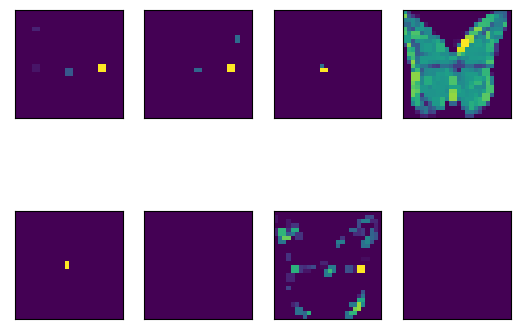

In [34]:
# redefine model to output right after the first hidden layer
model_1h = Model(inputs=model.inputs, outputs=model.layers[1].output)
model_1h.summary()
# load the image with the required shape
img = load_img("/kaggle/input/cs671-assignment5/Group_18/train/butterfly/image_0001.jpg", target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
img = img/255
# get feature map for first hidden layer
feature_maps = model_1h.predict(img)

ix = 1
for _ in range(8):
		# specify subplot and turn of axis
		ax = pyplot.subplot(2, 4, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel 
		pyplot.imshow(feature_maps[0, :, :, ix-1])
		ix += 1
# show the figure
pyplot.show()	

# available cmaps:
# 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 
# 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 
# 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 
# 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 
# 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 
# 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 
# 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 
# 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 
# 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 
# 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 
# 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 
# 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 
# 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 
# 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 
# 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 
# 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 
# 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 
# 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 
# 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 
# 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 
# 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 
# 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 
# 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 
# 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 
# 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 
# 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 8)         2912      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 16)        3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 32)         0

4
/kaggle/input/cs671-assignment5/Group_18/train/buddha/image_0069.jpg
(224, 224, 3)
1/1 [==============================] - 0s 78ms/step
(80, 48) (146, 114)


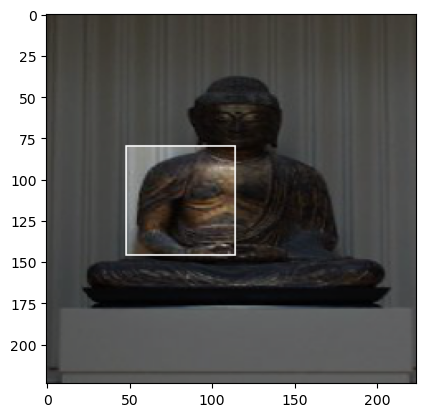

/kaggle/input/cs671-assignment5/Group_18/train/butterfly/image_0057.jpg
(224, 224, 3)
1/1 [==============================] - 0s 27ms/step
(0, 64) (66, 130)


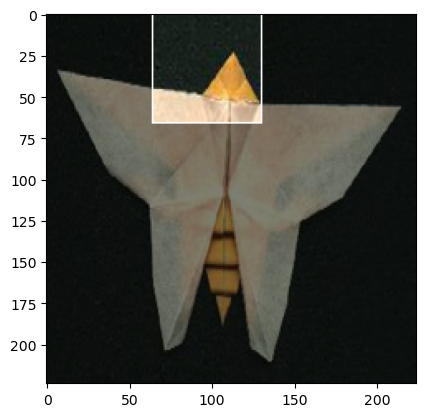

/kaggle/input/cs671-assignment5/Group_18/train/ewer/image_0057.jpg
(224, 224, 3)
1/1 [==============================] - 0s 27ms/step
(48, 16) (114, 82)


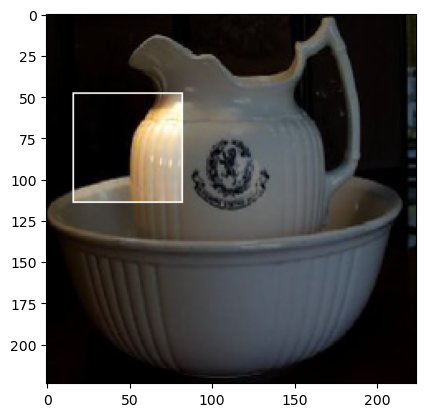

/kaggle/input/cs671-assignment5/Group_18/train/revolver/image_0058.jpg
(224, 224, 3)
1/1 [==============================] - 0s 28ms/step
(112, 16) (178, 82)


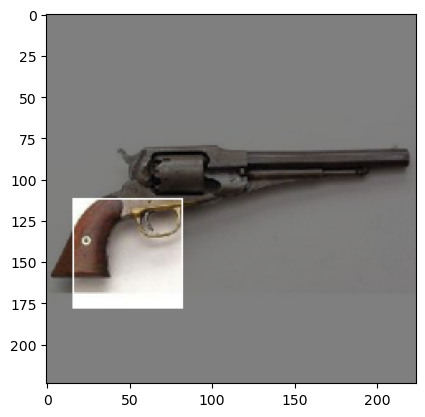

/kaggle/input/cs671-assignment5/Group_18/train/trilobite/image_0008.jpg
(224, 224, 3)
1/1 [==============================] - 0s 26ms/step
(0, 32) (66, 98)


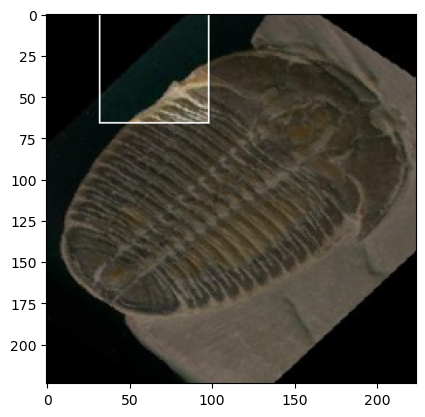

In [35]:
# input patch corresponding to maximally activated neuron in the last convolution layer:
def find_last_conv_layer(model):
    l = 0
    i = 1
    for layer in model.layers:
        if isinstance(layer, Conv2D):
            i = l
        l += 1
    return i
find_last_conv_layer(model)
print(find_last_conv_layer(model))          
def find_max(arr):
    return np.unravel_index(np.argmax(arr), arr.shape)[1:-1]
def trace(left_idx, right_idx, layer_idx, model):
    top_left = left_idx
    bottom_right = right_idx
    for i in range(layer_idx, 0, -1):
        layer = model.layers[i]
        c = layer.kernel_size[0] if isinstance(model.layers[i], Conv2D) else layer.pool_size[0]
        s = layer.strides[0]
        l_i, l_j = top_left
        r_i, r_j = bottom_right
        if layer.padding == 'same':
            p = c // 2
            top_left = max(0, s * l_i - p), max(0, s * l_j - p)
            bottom_right = min(s * r_i + (c-1) - p, layer.output.shape[1]) , min(s * r_j + (c-1) - p, layer.output.shape[2])
        else:
            top_left = s * l_i, s * l_j
            bottom_right = s * r_i + (c-1), s * r_j + (c-1)
    
    return top_left, bottom_right

last_layer = find_last_conv_layer(model)
new_model = Model(inputs = model.input, outputs = model.layers[last_layer].output)
# fig, axes = plt.subplots(nrows = 5, ncols = 1)\
# new_model.summary()
images = []
for a, class_name in enumerate(class_names):
    img = PILImage.open(os.path.join(f"/kaggle/input/cs671-assignment5/Group_18/train/{class_name}", os.listdir(f"/kaggle/input/cs671-assignment5/Group_18/train/{class_name}")[9]))
    if img.mode != 'RGB':
        img = img.convert("RGB")
    img = img.resize((224,224))
    img = np.asarray(img)
    img_normalized = tf.keras.applications.vgg19.preprocess_input(img) 
    img_normalizd = img
    print(os.path.join(f"/kaggle/input/cs671-assignment5/Group_18/train/{class_name}", os.listdir(f"/kaggle/input/cs671-assignment5/Group_18/train/{class_name}")[9]))
    print(img_normalized.shape)
    output = new_model.predict(np.array([img_normalized]))
    mx_neuron = find_max(output)
    left_idx, right_idx = trace(mx_neuron, mx_neuron, last_layer, new_model)
    print(left_idx, right_idx)
    cropped_img = img.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            l_i, l_j = left_idx
            r_i, r_j = right_idx
            if(i < l_i or j < l_j or i > r_i or j > r_j):
                cropped_img[i,j,:] //=2
            elif(i == l_i or i == r_i or j == l_j or j == r_j):
                cropped_img[i,j,:] = 255
    plt.imshow(cropped_img)
    plt.show()


In [10]:
model